**1**. (20 points) 

Create a `pandas` DataFrame with these values

|name|a-b-|a-b+|a+b-|a+b+|
|-|-|-|-|-|
|ann|1|2|3|4|
|bob|5|6|7|8|

Now convert it to another DataFrame so that it looks like

|    | name   | a   | b   |   value |
|---:|:-------|:----|:----|--------:|
|  0 | ann    | -   | -   |       1 |
|  2 | ann    | -   | +   |       2 |
|  4 | ann    | +   | -   |       3 |
|  6 | ann    | +   | +   |       4 |
|  1 | bob    | -   | -   |       5 |
|  3 | bob    | -   | +   |       6 |
|  5 | bob    | +   | -   |       7 |
|  7 | bob    | +   | +   |       8 |

Note - all information used to construct the second DataFrame must be derived from the first one.

In [440]:
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from itertools import product

In [441]:
col = ['name', 'a-b-', 'a-b+', 'a+b-', 'a+b+']
val = [['ann', 1, 2, 3, 4],
       ['bob', 5, 6, 7, 8]]

# original dataframe
df = pd.DataFrame(val, columns=col)
df

,name,a-b-,a-b+,a+b-,a+b+
0,ann,1,2,3,4
1,bob,5,6,7,8


In [442]:
# modified dataframe
df = pd.melt(df, id_vars=['name'])                                            # wide to long on name
df[['a', 'b']] = df.variable.str.replace('a', '').str.split('b', expand=True) # columns of sign following a and b
df = df.drop(columns='variable').sort_values(by='name')                       # sort by name
df['value'] = df.pop('value')                                                 # put value column at end like example
df

,name,a,b,value
0,ann,-,-,1
2,ann,-,+,2
4,ann,+,-,3
6,ann,+,+,4
1,bob,-,-,5
3,bob,-,+,6
5,bob,+,-,7
7,bob,+,+,8


**2**. (20 points)

Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment.  What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

In [443]:
def max_run(s):
    """ 
    Finds longest sequence of heads
    """
    return len(max(re.findall(r'H*', s), key=len))

n = 10000
k = 100

# rows = experiment, cols = # of flips
flips = list(map(''.join, np.random.choice(['H', 'T'], (n, k))))
runs  = list(map(max_run, flips))

# get most common length
stats.mode(runs)[0][0]

5

**3**. (20 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [444]:
def sieve_of_eratosthenes(n):
    """
    Return primes below n
    """
    ints = np.ones(n, dtype=np.bool)
    ints[0:1] = 0
    
    # factors come in pairs - only check until sqrt(n)
    for i in range( 2, int( np.floor(np.sqrt(n) + 1) ) ):
        if ints[i]:
            ints[2*i::i] = 0
    
    return np.where(ints != 0)[0]

sieve_of_eratosthenes(1000)

array([  1,   2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,
        41,  43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97,
       101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163,
       167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233,
       239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311,
       313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389,
       397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463,
       467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563,
       569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641,
       643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727,
       733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821,
       823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907,
       911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997],
      dtype=int64)

**4**. (40 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
```

which you feed into your `make_plots` function
```python
make_plots(rules, niter)
```

You may, of course, write other helper functions to keep your code modular.

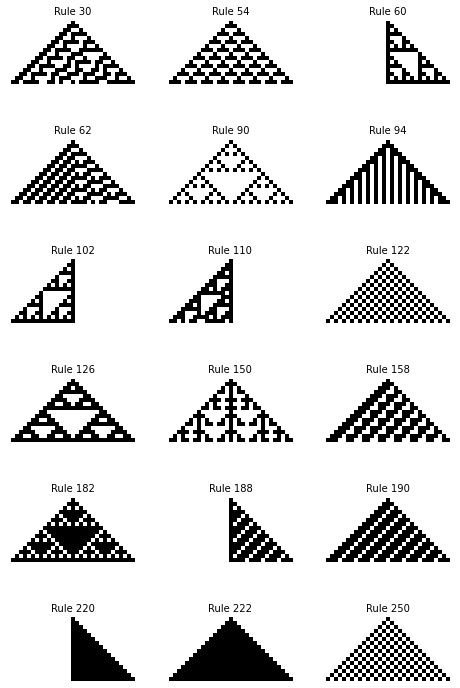

In [445]:
matplotlib.rcParams['figure.figsize'] = [8, 64/5]
matplotlib.rcParams['axes.titlesize'] = 10

def run_automata(rule, n):
    """
    Run automata of specific rule for n iter.
    Returns np array of results
    """
    k = 2*n+3 # width proportional to number of iterations
    rule = np.unpackbits(np.uint8(rule))
    cells = np.zeros((n, k), dtype=np.int)
    cells[0, k//2] = 1

    for i in range(n-1):
        # 1) isolate consecutive triplets
        # 2) convert triplets from binary repr. to decimal
        # 3) use value as rule index to get value for next iter.
        cells[i+1, 1:-1] = list(map(
            lambda b: rule[7 - np.packbits(b, bitorder='little')[0]],
            np.vstack([
                cells[i, 2:], 
                cells[i, 1:-1], 
                cells[i, :-2]
            ]).T 
        ))

    # flip to look like examples, idk why
    return cells[:, 1:-1]

def make_plots(rules, niter):
    """
    Plots automata of size niter based on rules
    """
    sub_x, sub_y = 3, int(len(rules)//3 + (len(rules)%3!=0))
    fig, ax = plt.subplots(sub_y, sub_x)
    
    for i, rule in enumerate(rules):
        x, y = i%3, i//3
        ax[y, x].imshow(run_automata(rule, niter), 
                        cmap='binary',
                        interpolation=None)
        ax[y, x].set_title('Rule {}'.format(rule))
        ax[y, x].axis('off')
        
    # hide unused subplots (idk how else to do this)
    for j in range(i, sub_x*sub_y):
        x, y = j%3, j//3
        ax[y, x].axis('off')
        
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122,
         126, 150, 158, 182, 188, 190, 220, 222, 250]

make_plots(rules, 16)